In [124]:
# Install seaborn library
%pip install seaborn

In [125]:
# Import libraries and packages
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay

In [126]:
# Modifying pandas to display all columns
pd.set_option('display.max_columns', None)

In [127]:
# Import the dataset
companies = pd.read_csv('Modified_Unicorn_Companies.csv')

In [128]:
# Display the first five rows
companies.head(n=5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [129]:
# Display the data types of the columns
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   int64 
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1057 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1074 non-null   object
dtypes: int64(2), object(8)
memory usage: 50.4+ KB


In [130]:
# Convert Date Joined column to datetime
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies.dtypes

Company                     object
Valuation                    int64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [131]:
# Create a column called Years To Unicorn
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6


In [132]:
# Identify any issues with our data
companies.describe(include='all', datetime_is_numeric=True)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
count,1074,1074.000000,1074,1074,1057,1074,1074,1074.000000,1074,1074,1074.000000
unique,1071,NaN,NaN,18,256,47,6,NaN,538,1059,NaN
top,BrewDog,NaN,NaN,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital,NaN
freq,2,NaN,NaN,204,149,561,588,NaN,59,3,NaN
mean,NaN,3.445996,2020-05-14 20:22:47.597765376,NaN,NaN,NaN,NaN,2012.870577,NaN,NaN,7.013035
min,NaN,1.000000,2007-07-02 00:00:00,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN,-3.000000
25%,NaN,1.000000,2019-05-15 06:00:00,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,4.000000
50%,NaN,2.000000,2021-03-26 00:00:00,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,6.000000
75%,NaN,3.000000,2021-09-16 00:00:00,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,9.000000
max,NaN,180.000000,2022-04-05 00:00:00,NaN,NaN,NaN,NaN,2021.000000,NaN,NaN,98.000000


In [133]:
# Isolate any rows where Years To Unicorn is negative
companies[companies['Years To Unicorn'] < 0]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2020,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


In [134]:
# Replace InVision's Year Founded value with 2011
companies.loc[companies['Years To Unicorn'] < 0, 'Year Founded'] = 2011

# Verify the change was made
companies[companies['Years To Unicorn'] < 0]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2011,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


In [135]:
# Recalculate all values in the Years To Unicorn column
companies['Years To Unicorn'] = companies['Date Joined'].dt.year - companies['Year Founded']

# Verify that there are no more negative values in the column
companies.describe(include='all', datetime_is_numeric=True)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
count,1074,1074.000000,1074,1074,1057,1074,1074,1074.000000,1074,1074,1074.000000
unique,1071,NaN,NaN,18,256,47,6,NaN,538,1059,NaN
top,BrewDog,NaN,NaN,Fintech,San Francisco,United States,North America,NaN,$1B,Sequoia Capital,NaN
freq,2,NaN,NaN,204,149,561,588,NaN,59,3,NaN
mean,NaN,3.445996,2020-05-14 20:22:47.597765376,NaN,NaN,NaN,NaN,2012.862197,NaN,NaN,7.021415
min,NaN,1.000000,2007-07-02 00:00:00,NaN,NaN,NaN,NaN,1919.000000,NaN,NaN,0.000000
25%,NaN,1.000000,2019-05-15 06:00:00,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,4.000000
50%,NaN,2.000000,2021-03-26 00:00:00,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,6.000000
75%,NaN,3.000000,2021-09-16 00:00:00,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,9.000000
max,NaN,180.000000,2022-04-05 00:00:00,NaN,NaN,NaN,NaN,2021.000000,NaN,NaN,98.000000


In [136]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

In [137]:
# Check if there are values in Industry but not in industry_list
set(companies['Industry']).difference(set(industry_list))

{'Artificial Intelligence', 'Data management and analytics', 'FinTech'}

In [138]:
# Create replacement_dict
replacement_dict = {'Artificial Intelligence': 'Artificial intelligence', 'Data management and analytics': 'Data management & analytics', 'FinTech': 'Fintech'}

# Replace the incorrect values in the Industry column
companies['Industry'] = companies['Industry'].replace(replacement_dict)

# Verify that there are no longer any elements in Industry that are not in industry_list
set(companies['Industry']).difference(set(industry_list))

set()

In [139]:
# Identify if there are duplicate rows
companies['Company'].drop_duplicates().size == companies['Company'].size

False

In [140]:
# Isolate rows of all companies that have duplicates
companies[companies.duplicated(subset=['Company'], keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
385,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,United Kingdom,Europe,2007,$233M,"TSG Consumer Partners, Crowdcube",10
386,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,UnitedKingdom,Europe,2007,$233M,TSG Consumer Partners,10
510,ZocDoc,2,2015-08-20,Health,New York,United States,North America,2007,$374M,"Founders Fund, Khosla Ventures, Goldman Sachs",8
511,ZocDoc,2,2015-08-20,Health,NaN,United States,North America,2007,$374M,Founders Fund,8
1031,SoundHound,1,2018-05-03,Artificial intelligence,Santa Clara,United States,North America,2005,$215M,"Tencent Holdings, Walden Venture Capital, Glob...",13
1032,SoundHound,1,2018-05-03,Other,Santa Clara,United States,North America,2005,$215M,Tencent Holdings,13


In [141]:
# Drop rows of duplicate companies after their first occurance
companies = companies.drop_duplicates(subset=['Company'], keep='first')

In [142]:
# Verify the duplicates are dropped
companies[companies.duplicated(subset=['Company'], keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn


In [143]:
# Create new High Valuation column
# Use qcut to divide Valuation into high and low Valuation groups
companies['High Valuation'] = pd.qcut(
    companies['Valuation'],
    2,
    labels = [0, 1])

# Show the new column
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,1
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,1
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,1
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,1
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,1


In [144]:
# Rank the continents by number of unicorn companies
companies.groupby('Continent')['Company'].count().sort_values(ascending=False).reset_index()

,Continent,Company
0,North America,586
1,Asia,310
2,Europe,143
3,South America,21
4,Oceania,8
5,Africa,3


In [145]:
# Create numeric Continent Number column
continent_dict = {'North America': 1,
                  'Asia': 2,
                  'Europe': 3,
                  'South America': 4,
                  'Oceania': 5,
                  'Africa': 6
                 }
companies['Continent Number'] = companies['Continent'].replace(continent_dict)
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Continent Number
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,1,2
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,1,1
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,1,2
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,1,1
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,1,3


In [146]:
# Create numeric categories for Country/Region
companies['Country/Region Numeric'] = companies['Country/Region'].astype('category').cat.codes

In [147]:
# Create dummy variables with Industry values
industry_encoded = pd.get_dummies(companies['Industry'])

# Combine companies DataFrame with new dummy Industry columns
companies = pd.concat([companies, industry_encoded], axis=1)

# Drop the Industry column since it's no longer needed
companies = companies.drop('Industry', axis=1)

In [148]:
# Remove $, B, and M designations from Funding column using regular expression
companies['Funding'] = companies['Funding'].str.replace('[$BM]', '', regex=True)

In [149]:
# Identify if there are any other designations in the Funding column
companies['Funding'].value_counts()

1          60
2          30
200        12
Unknown    12
4           9
           ..
29          1
717         1
101         1
19          1
620         1
Name: Funding, Length: 536, dtype: int64

In [150]:
# Display the rows where Funding is Unknown
companies[companies['Funding'] == 'Unknown']

,Company,Valuation,Date Joined,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn,High Valuation,Continent Number,Country/Region Numeric,Artificial intelligence,Auto & transportation,Consumer & retail,Cybersecurity,Data management & analytics,E-commerce & direct-to-consumer,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel
214,SSENSE,4,2021-06-08,Montreal,Canada,North America,2003,Unknown,Sequoia Capital,18,1,1,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
424,Uplight,2,2021-03-03,Boulder,United States,North America,2019,Unknown,"Rubicon Technology Partners, Max Ventures, Inc...",2,0,1,44,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
566,ISN,2,2020-12-17,Dallas,United States,North America,2001,Unknown,Blackstone,19,0,1,44,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
638,SITECH DEV,1,2019-05-16,Guiyang,China,Asia,2017,Unknown,China Prosperity Capital,2,0,2,9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
650,Xiaobing,1,2021-07-12,Beijing,China,Asia,2020,Unknown,"NetEase Capital, Northern Light Venture Capita...",1,0,2,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
716,Veepee,1,2007-07-02,La Plaine Saint-Denis,France,Europe,2001,Unknown,"Summit Partners, Qatar Holding",6,0,3,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
732,DistroKid,1,2021-08-16,New York,United States,North America,2013,Unknown,"Insight Partners, Silversmith Capital Partners...",8,0,1,44,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
865,Assembly,1,2021-09-21,Culver City,United States,North America,2019,Unknown,"Advent International, PSG, Providence Equity P...",2,0,1,44,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
889,Carson Group,1,2021-07-14,Lincoln,United States,North America,2012,Unknown,Bain Capital,9,0,1,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
944,Iodine Software,1,2021-12-01,Austin,United States,North America,2010,Unknown,"Advent International, Bain Capital Ventures, S...",11,0,1,44,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [151]:
# Create a new dataframe to remove the rows missing Funding information
companies_trimmed = companies[companies['Funding'] != 'Unknown'].copy()

In [152]:
# Convert Funding column to 
companies_trimmed['Funding'] = companies_trimmed['Funding'].astype(int)

In [153]:
companies_trimmed['Number of Investors'] = companies_trimmed['Select Investors'].apply(lambda x: len(x.split(',')))
companies_trimmed = companies_trimmed.drop('Select Investors', axis=1)

In [154]:
companies_trimmed['City Numeric'] = companies_trimmed['City'].astype('category').cat.codes
companies_trimmed['Continent Numeric'] = companies_trimmed['Continent'].astype('category').cat.codes
companies_trimmed = companies_trimmed.drop(['Country/Region', 'City', 'Continent'], axis=1)

In [155]:
# Drop our Date Joined column
companies_trimmed = companies_trimmed.drop('Date Joined', axis=1)

In [156]:
# Create a new target variable column for our model
companies_trimmed['Unicorn Within 5 Years'] = (companies_trimmed['Years To Unicorn'] <= 5).astype(int)

# Check our class balance
companies_trimmed['Unicorn Within 5 Years'].value_counts()

0    600
1    459
Name: Unicorn Within 5 Years, dtype: int64

In [157]:
# Separate the dataset into features (X) and target variable (y)
X = companies_trimmed.drop(['Company', 'Years To Unicorn', 'Unicorn Within 5 Years'], axis=1)
y = companies_trimmed['Unicorn Within 5 Years']

In [158]:
# Split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [159]:
# Instantiate our random forest classifier
rf = RandomForestClassifier(random_state=0)

In [160]:
# Fit our data to the random forest model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [161]:
# Make predictions on the test dataset
y_pred = rf.predict(X_test)

In [162]:
# Evaluate our base model
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1 = f1_score(y_test, y_pred)
print('f1:', f1)

Precision: 0.8313253012048193
Recall: 0.8214285714285714
Accuracy: 0.8632075471698113
f1: 0.8263473053892216


In [163]:
# Show the parameters of our base model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [164]:
# Tune our model
cv_params = {'n_estimators': [50, 100, 200],
             'max_depth': [None, 10, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]
            }

In [165]:
# Define the custom scoring function
scoring = ['precision', 'recall', 'accuracy', 'f1']

In [166]:
# Use GridSearchCV for hyperparameter tuning and cross validation
rf_cv = GridSearchCV(rf, param_grid=cv_params, cv=5, scoring=scoring, refit='f1')

In [167]:
%%time
# Fit our data to the tuned model
rf_cv.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3min 33s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1', scoring=['precision', 'recall', 'accuracy', 'f1'])

In [168]:
# View the best parameters
print('Best Parameters:', rf_cv.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [169]:
# Make predictions on the test dataset
y_pred = rf_cv.predict(X_test)

In [170]:
# Evaluate our tuned model
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1 = f1_score(y_test, y_pred)
print('f1:', f1)

Precision: 0.8625
Recall: 0.8214285714285714
Accuracy: 0.8773584905660378
f1: 0.8414634146341463


In [171]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

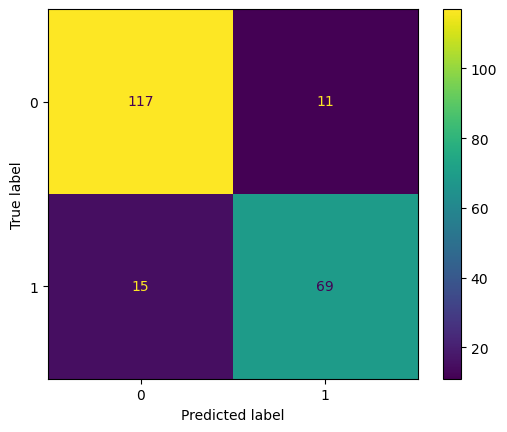

In [172]:
# Display our confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)
disp.plot()